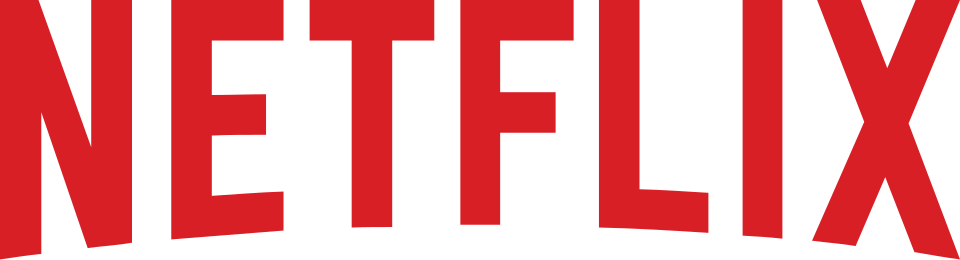

**<center><span style="font-size: 30px;">Проектная работа: Netflix в Tableau</span></center>**

[Ссылка на проект](https://public.tableau.com/views/NetflixAnalyse_17575915041170/Netflix_1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Подготовка-исходных-данных" data-toc-modified-id="Подготовка-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка исходных данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Вывод-общей-информации" data-toc-modified-id="Вывод-общей-информации-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод общей информации</a></span></li><li><span><a href="#Обработка-неявных-дубликатов" data-toc-modified-id="Обработка-неявных-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка неявных дубликатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Дашборды" data-toc-modified-id="Дашборды-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Дашборды</a></span><ul class="toc-item"><li><span><a href="#Дашборд-1.-Netflix-контент-по-странам" data-toc-modified-id="Дашборд-1.-Netflix-контент-по-странам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дашборд 1. Netflix-контент по странам</a></span></li><li><span><a href="#Дашборд-2.-Эволюция-каталога-Netflix" data-toc-modified-id="Дашборд-2.-Эволюция-каталога-Netflix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дашборд 2. Эволюция каталога Netflix</a></span></li><li><span><a href="#Дашборд-3.-Анализ-рейтингов-и-длительности" data-toc-modified-id="Дашборд-3.-Анализ-рейтингов-и-длительности-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дашборд 3. Анализ рейтингов и длительности</a></span></li><li><span><a href="#Дашборд-4.-Прогноз-и-основные-метрики" data-toc-modified-id="Дашборд-4.-Прогноз-и-основные-метрики-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дашборд 4. Прогноз и основные метрики</a></span></li><li><span><a href="#Дашборд-5.-Найди-свой-контент-на-вечер" data-toc-modified-id="Дашборд-5.-Найди-свой-контент-на-вечер-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Дашборд 5. Найди свой контент на вечер</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Заключение:" data-toc-modified-id="Заключение:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Заключение:</a></span></li></ul></div>

# Техническое задание

Цель проекта - исследовать и визуализировать данные американского стримингового сервиса Netflix.

# Подготовка исходных данных

## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np

In [2]:
netflix_df = pd.read_csv('/Users/anastasia/Downloads/netflix_titles.csv')

## Вывод общей информации

In [3]:
def data_info(df, name=''):
    print(f'{name}')
    print('-'*50)
    print(df.head())
    print('-'*50)
    print (f'Основная информация:')
    print('-'*50)
    print (df.info())
    print('-'*50)
    print('Пропуски в столбцах:')
    print('-'*50)
    print(df.isna().sum())
    print('-'*50)
    print('Процентное соотношение пропусков:')
    print('-'*50)
    percent_missings = df.isnull().sum() * 100 / (df.count().values + df.isnull().sum())
    print(percent_missings.round())
        
    print('-'*50)
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
data_info(netflix_df, 'Netflix')

Netflix
--------------------------------------------------
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021      

Обработку пропусков и типы данных будем производить в Tableau. 

## Обработка неявных дубликатов

In [5]:
def duplicates_func(df=netflix_df, columns=netflix_df.columns):
    for col in columns:
        print(col, df[col].sort_values().unique())

In [6]:
rows_unique = ['type', 'title', 'director', 'country', 'listed_in', 'rating']
duplicates_func(netflix_df, rows_unique)

type ['Movie' 'TV Show']
title ['#Alive' '#AnneFrank - Parallel Stories' '#FriendButMarried' ... '마녀사냥'
 '반드시 잡는다' '최강전사 미니특공대 : 영웅의 탄생']
director ['A. L. Vijay' 'A. Raajdheep' 'A. Salaam' ... 'Ömer Faruk Sorak'
 'Şenol Sönmez' nan]
country [', France, Algeria' ', South Korea' 'Argentina'
 'Argentina, Brazil, France, Poland, Germany, Denmark' 'Argentina, Chile'
 'Argentina, Chile, Peru' 'Argentina, France'
 'Argentina, France, United States, Germany, Qatar' 'Argentina, Italy'
 'Argentina, Spain' 'Argentina, United States'
 'Argentina, United States, Mexico' 'Argentina, Uruguay, Serbia'
 'Argentina, Uruguay, Spain, France' 'Argentina, Venezuela' 'Australia'
 'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay'
 'Australia, Canada' 'Australia, France' 'Australia, France, Ireland'
 'Australia, Germany' 'Australia, India' 'Australia, Iraq'
 'Australia, New Zealand' 'Australia, New Zealand, United States'
 'Australia, 

Как видно, страны некорректно отображаются, есть, начинающиеся с запятой и с пропусками. Для анализа будет удобнее разбить страны и жанры. В рейтинге также встречается информация о продолжительности, а не рейтинге.

In [7]:
netflix_df.loc[netflix_df['rating'].isin(['66 min', '74 min', '84 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [8]:
# Находим строки, где в рейтинге указана длительность
mask = netflix_df['rating'].isin(['66 min', '74 min', '84 min'])

# перемещаем значения из rating в duration для этих строк
netflix_df.loc[mask, 'duration'] = netflix_df.loc[mask, 'rating']

# заменяем эти значения в rating на NaN
netflix_df.loc[mask, 'rating'] = np.nan

In [9]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

- TV-14 - Для зрителей от 14 лет
- TV-MA - Для взрослой аудитории
- TV-PG - Рекомендуется контроль родителей
- TV-Y - Для детей всех возрастов
- TV-Y7 - Для детей от 7 лет
- TV-G - Для любой аудитории
- TV-Y7-FV - Для детей от 7 лет (анимированное насилие)

- PG-13 - Детям до 13 лет просмотр не рекомендуется
- PG - Предлагается контроль родителей
- R - До 17 лет с родителями
- G - Для любой аудитории
- NC-17 - Просмотр с 18 лет

- NR - Без рейтинга
- UR - Без рейтинга

Объединим последние два рейтинга.

In [10]:
netflix_df['rating'] = netflix_df['rating'].replace(
    to_replace=['NR', 'UR'], 
    value='UR'
)

In [11]:
# Пишем функцию для обработки значений через запятую
def split_column_to_rows(df, column_name):
    """
    Функция для разделения значений в столбце по запятой
    и создания отдельных строк для каждого значения
    """
    # Заполняем пропуски
    
    rows_to_add = []
    
    for idx, row in df.iterrows():
        values = str(row[column_name]).split(',')
        values = [v.strip() for v in values]
        
        if len(values) == 1:
            continue
            
        for value in values[1:]:
            new_row = row.copy()
            new_row[column_name] = value.strip()
            rows_to_add.append(new_row)
        
        df.at[idx, column_name] = values[0].strip()
    
    if rows_to_add:
        additional_df = pd.DataFrame(rows_to_add)
        df = pd.concat([df, additional_df], ignore_index=True)
    
    return df

In [12]:
# Разделяем страны и жанры

netflix_df = split_column_to_rows(netflix_df, 'country')

netflix_df = split_column_to_rows(netflix_df, 'listed_in')


# Проверка
print("Проверка результатов:")
print("Уникальные значения рейтинга:", sorted(netflix_df['rating'].dropna().unique()))
print("Количество уникальных стран:", netflix_df['country'].nunique())
print("Количество уникальных жанров:", netflix_df['listed_in'].nunique())
print("Пример стран:", list(netflix_df['country'].dropna().unique())[:10])
print("Пример жанров:", list(netflix_df['listed_in'].dropna().unique())[:10])

Проверка результатов:
Уникальные значения рейтинга: ['G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']
Количество уникальных стран: 123
Количество уникальных жанров: 42
Пример стран: ['United States', 'South Africa', 'India', 'United Kingdom', 'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China']
Пример жанров: ['Documentaries', 'International TV Shows', 'Crime TV Shows', 'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas', 'British TV Shows', 'Comedies', 'TV Comedies']


В продолжительности фильма "Черное зеркало: Брандашмыг" скрывается ошибка. Исправим в Tableau с помощью Calculated Field на 90 минут вместо 320. Среди сериалов самый продолжительный  - Анатомия страсти: 17 сезонов.

## Вывод

В результате предобработке данных перед работой в Tableau обработали неявные дубликаты, разделили страны-производители и жанры, обработали аномальные значения. Пропуски в касте, режиссере и странах оставили как есть. Типы данных изменим в самом Tableau.

# Дашборды

## Дашборд 1. Netflix-контент по странам

Цель - визуализировать, как контент распределен по странам.

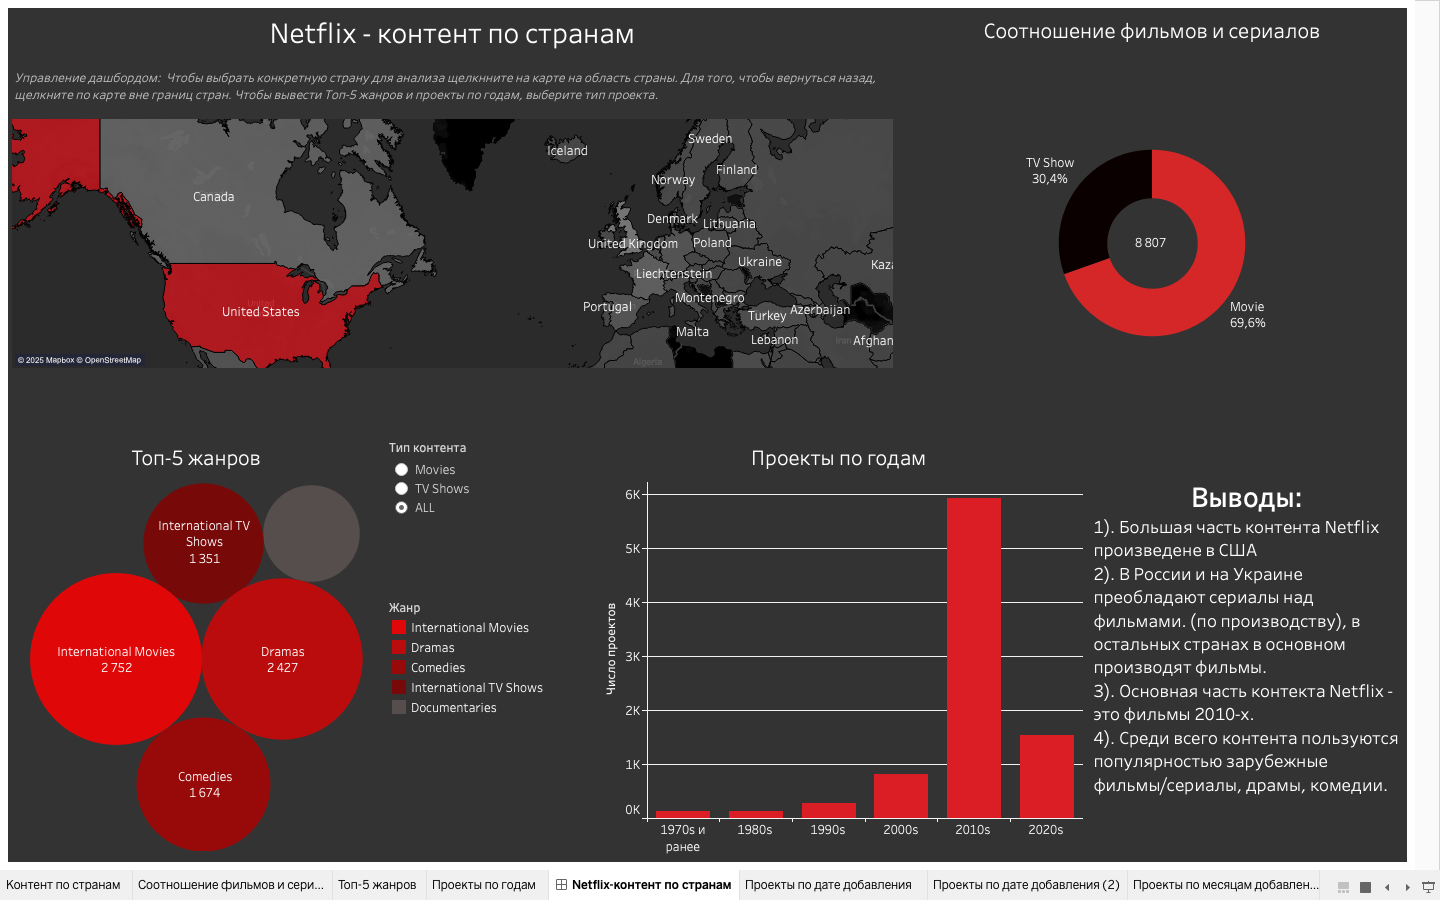

## Дашборд 2. Эволюция каталога Netflix

Цель - показать, как менялся и рос каталог Netflix с течением времени, и какие тренды в производстве контента преобладали.

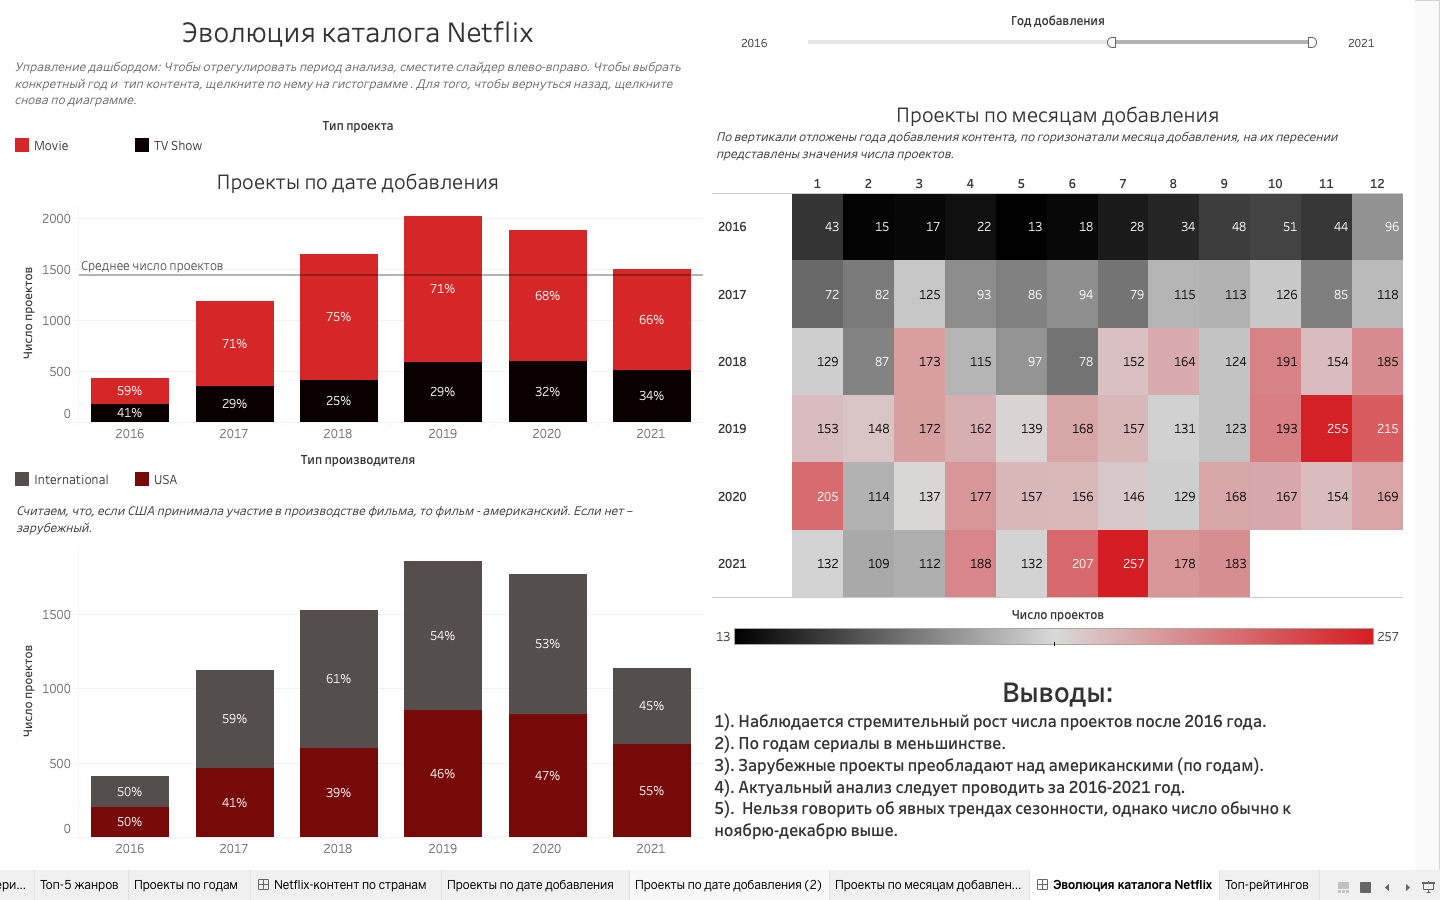

## Дашборд 3. Анализ рейтингов и длительности

Цель - исследовать, как возрастные рейтинги (TV-MA, PG-13 и т.д.) соотносятся с типами контента и его длительностью.

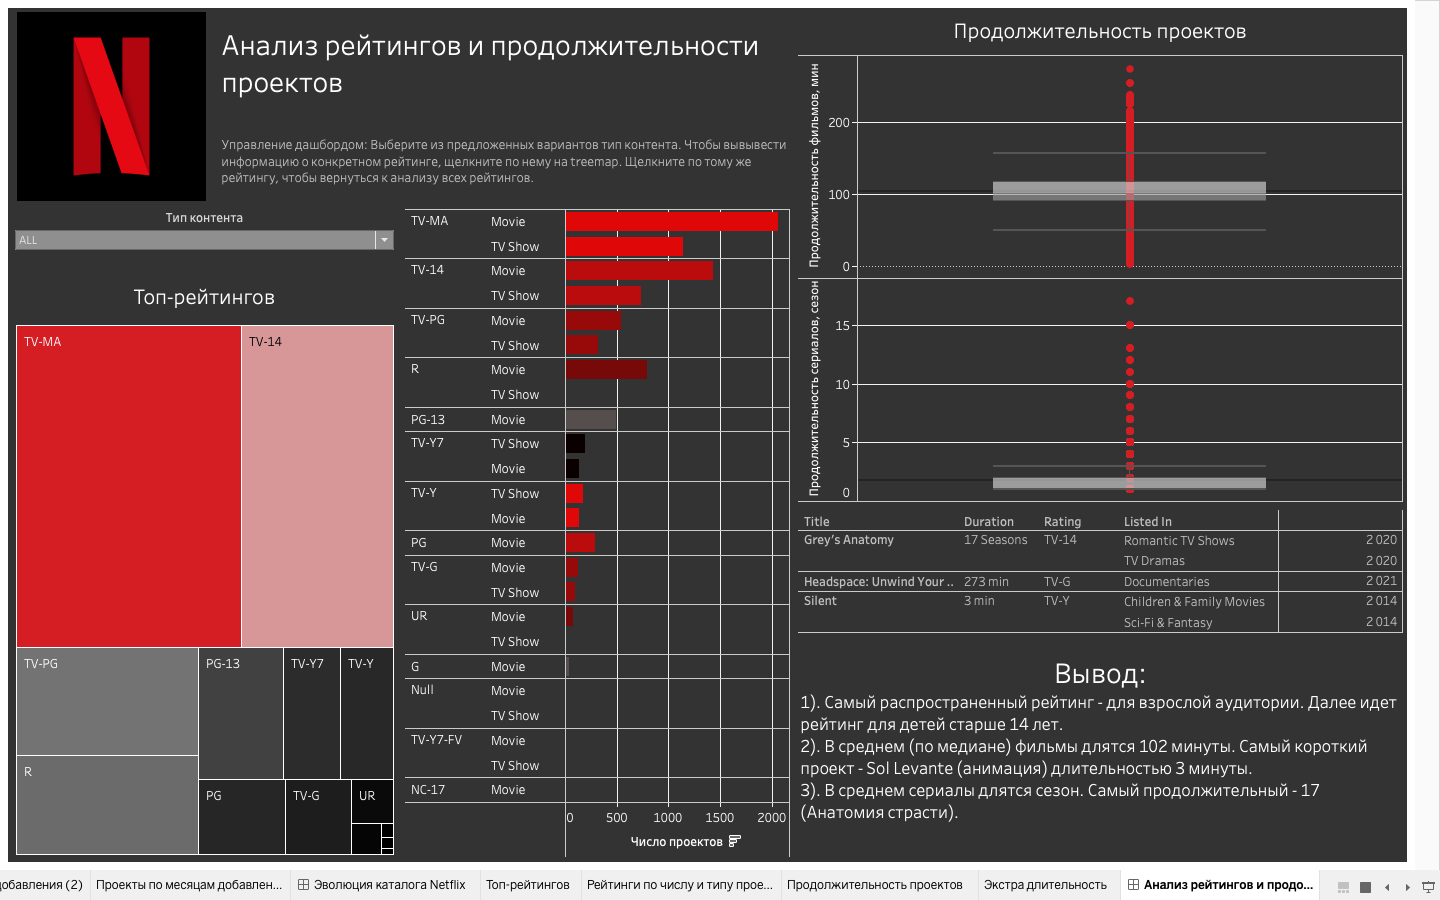

## Дашборд 4. Прогноз и основные метрики

Цель - показать основные показатели контента, а также спрогнозировать число проектов на конец 2021-2022 год (16 месяцев вперед).

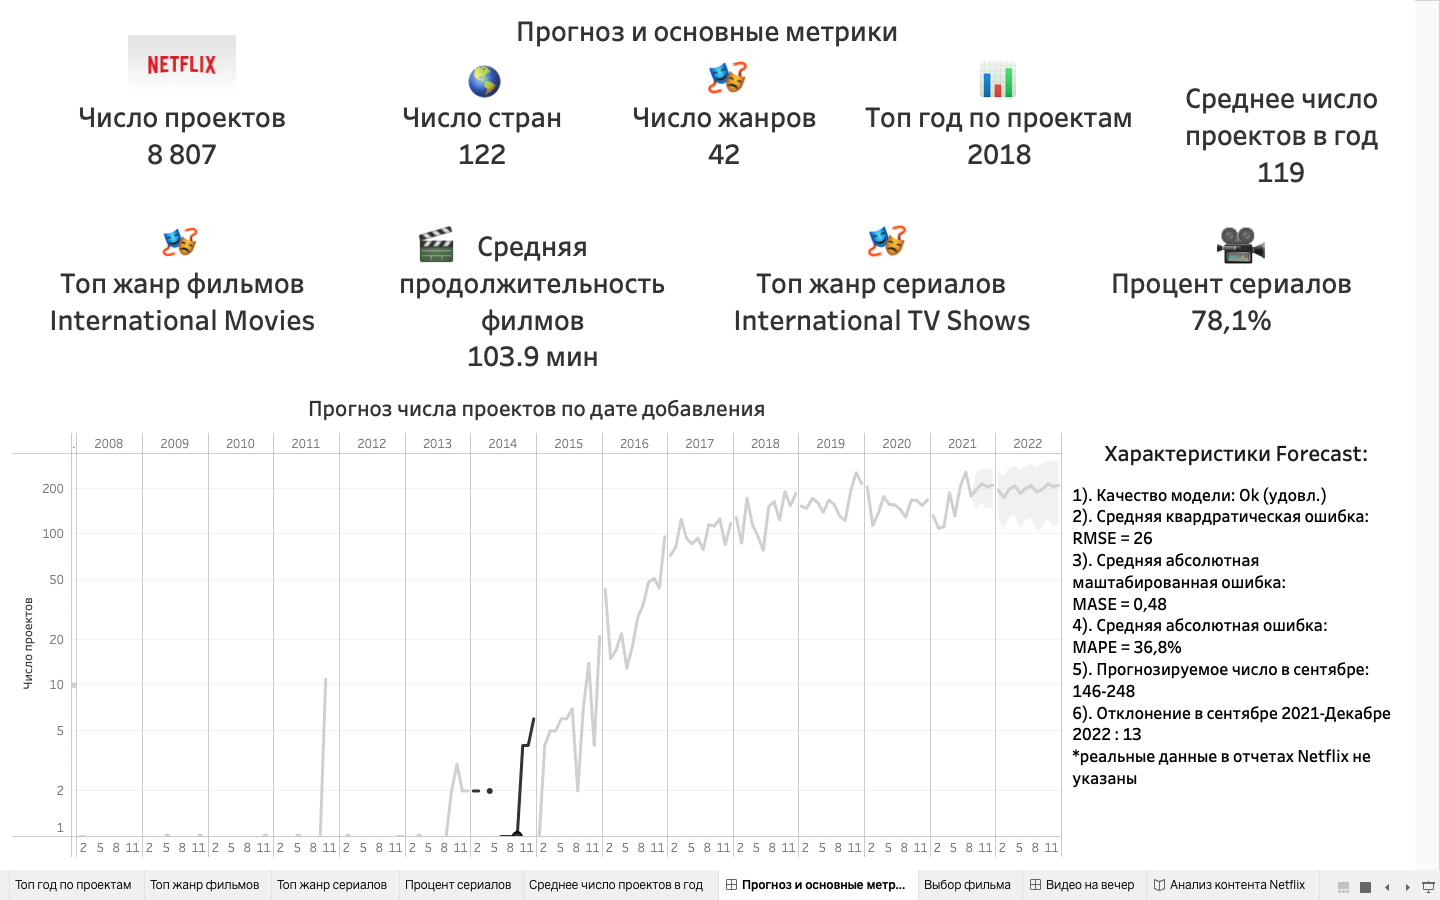

## Дашборд 5. Найди свой контент на вечер

Цель - проиллюстрировать с помощью фильтров поиск контента на сайте.

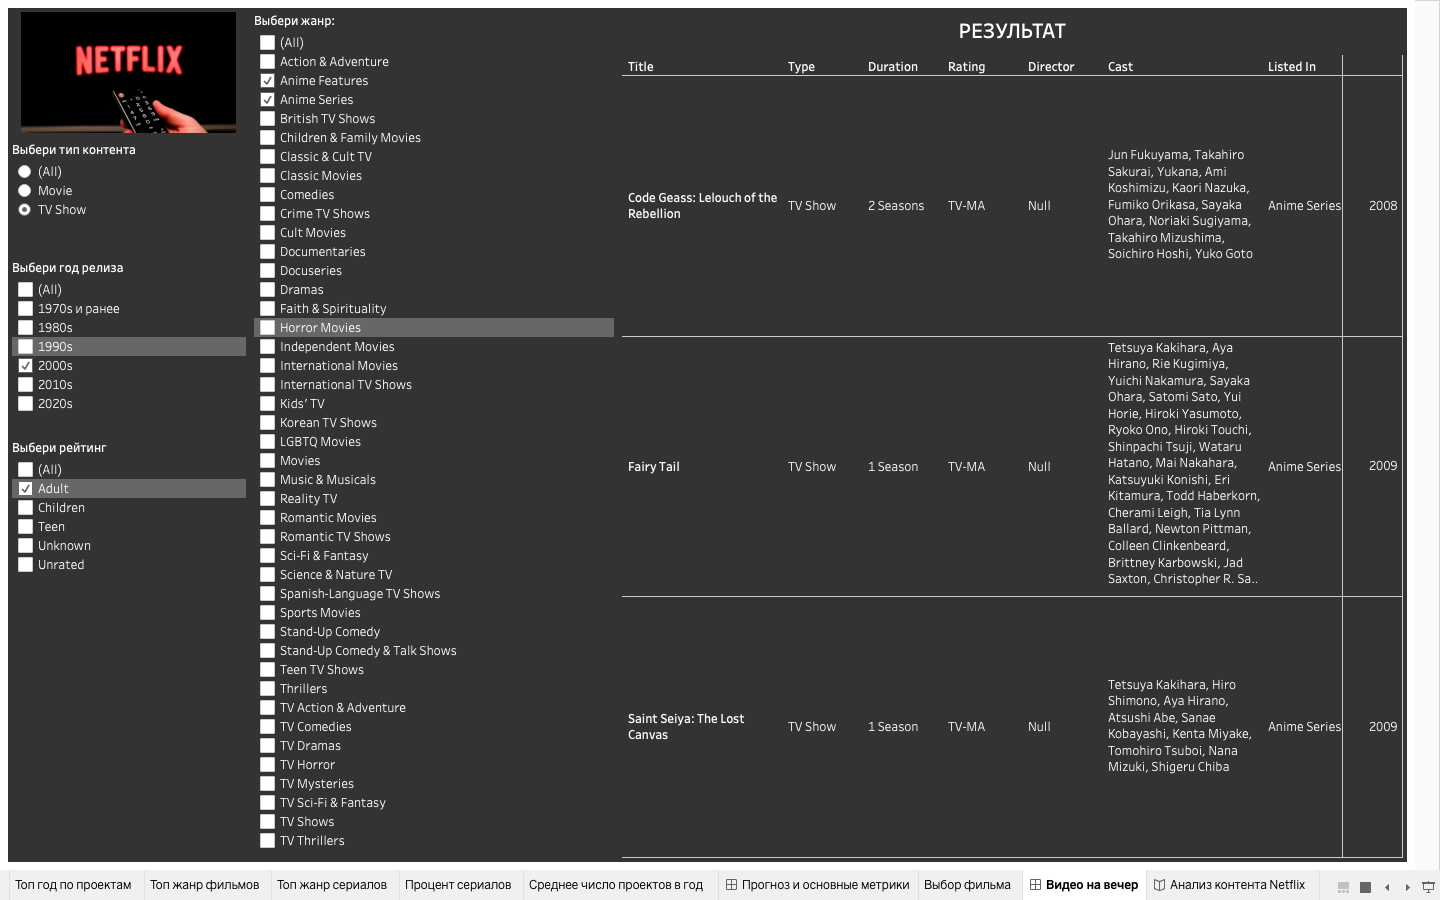

## Вывод:

Основные выводы представлены на дашбордах. [Ссылка на проект](https://public.tableau.com/views/NetflixAnalyse_17575915041170/Netflix_1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

# Заключение:
В результате проделанной работы было построено 5 дашбордов и подготовлена презентация. 